# Pokemon Data Analysis Project
***

### Introduction
The world of Pokemon is a beloved franchise from Japan that has millions of fans worldwide.
In this notebook, we will analyze and explore datasets containing information about various Pokemon species. Through data analysis, we aim to gain insights into different aspects of Pokemon, such as their types, abilities, and more. This project will showcase the power of Python as a tool for data analysis, manipulation, and visualization.

Potential questions:
- What are the most common types of pokemon?
- Which have the strongest stats?
- Determine any correlations between abilities
- Determine any correlations between commonality and types
- Which abilities are the most effective?



## Data
The datasets for this project were downloaded from Kaggle:

https://www.kaggle.com/datasets/terminus7/pokemon-challenge

https://www.kaggle.com/datasets/abcsds/pokemon

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import csv
poke = pd.read_csv('Pokemon.csv')
print(poke.head())


   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [87]:
#checking columns
print(poke.columns)

#drop Type 2 - there is no need for the sub type
poke = poke.drop('Type 2', axis=1)

#rename columns for easier calling
poke = poke.rename(columns={'#':'ID','Type 1': 'Type', 'Sp. Atk': 'Sp_Atk', 'Sp. Def': 'Sp_Def'})

#print(poke.head()) to verify changes went through

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [88]:
print(poke.dtypes, '\n')

ID             int64
Name          object
Type          object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp_Atk         int64
Sp_Def         int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object 



In [89]:
# Find the most common and rare types

print('Number of Pokemon by each type:')
print(poke['Type'].value_counts(), '\n')

print('Number of Pokemon in each generation:')
print(poke['Generation'].value_counts(), '\n')


Number of Pokemon by each type:
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type, dtype: int64 

Number of Pokemon in each generation:
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64 



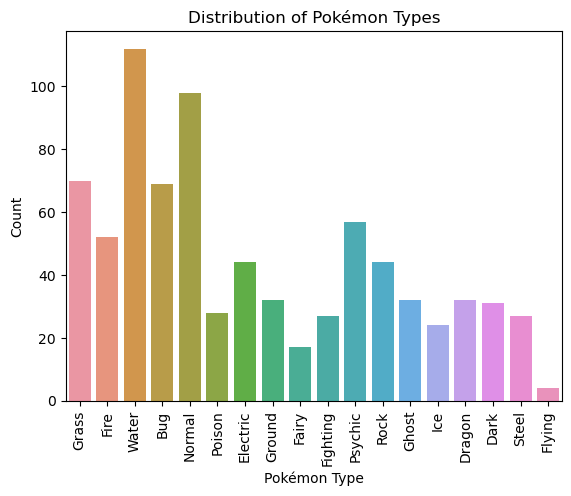

In [90]:
# Visualize the above chart of pokemon types
sns.countplot(data=poke, x='Type')
plt.xticks(rotation=90)
plt.xlabel('Pokémon Type')
plt.ylabel('Count')
plt.title('Distribution of Pokémon Types')
plt.show()


In [91]:
#average total stats for all pokemon
avg_tot = poke.Total.mean()
print(avg_tot)

435.1025


In [92]:
print('Median Stats for each type:')
print(poke.groupby('Type').agg('median')[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk','Sp_Def','Speed']].sort_values(by=['Total'],ascending=True))



Median Stats for each type:
          Total    HP  Attack  Defense  Sp_Atk  Sp_Def  Speed
Type                                                         
Bug       395.0  60.0    65.0     60.0    50.0    60.0   60.0
Poison    401.5  67.5    74.0     67.0    60.0    60.5   62.5
Fairy     405.0  78.0    52.0     66.0    75.0    79.0   45.0
Normal    415.0  70.0    70.5     60.0    50.0    60.5   71.0
Grass     430.0  65.5    70.0     66.0    75.0    66.0   58.5
Ground    440.0  75.0    85.0     84.5    47.5    62.5   65.0
Water     455.0  70.0    72.0     70.0    70.0    65.0   65.0
Fighting  455.0  70.0   100.0     70.0    40.0    63.0   60.0
Ghost     464.5  59.5    66.0     72.5    65.0    75.0   60.5
Dark      465.0  65.0    88.0     70.0    65.0    65.0   70.0
Ice       467.5  70.0    67.0     75.0    77.5    70.0   62.0
Rock      467.5  68.5    95.0    100.0    60.0    70.0   50.0
Electric  477.5  60.0    65.0     65.0    95.0    79.5   88.0
Fire      482.0  70.0    84.5     64.0    

C:\Users\Zackch\AppData\Local\Temp\ipykernel_18148\3046551269.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(poke.groupby('Type').agg('median')[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk','Sp_Def','Speed']].sort_values(by=['Total'],ascending=True))


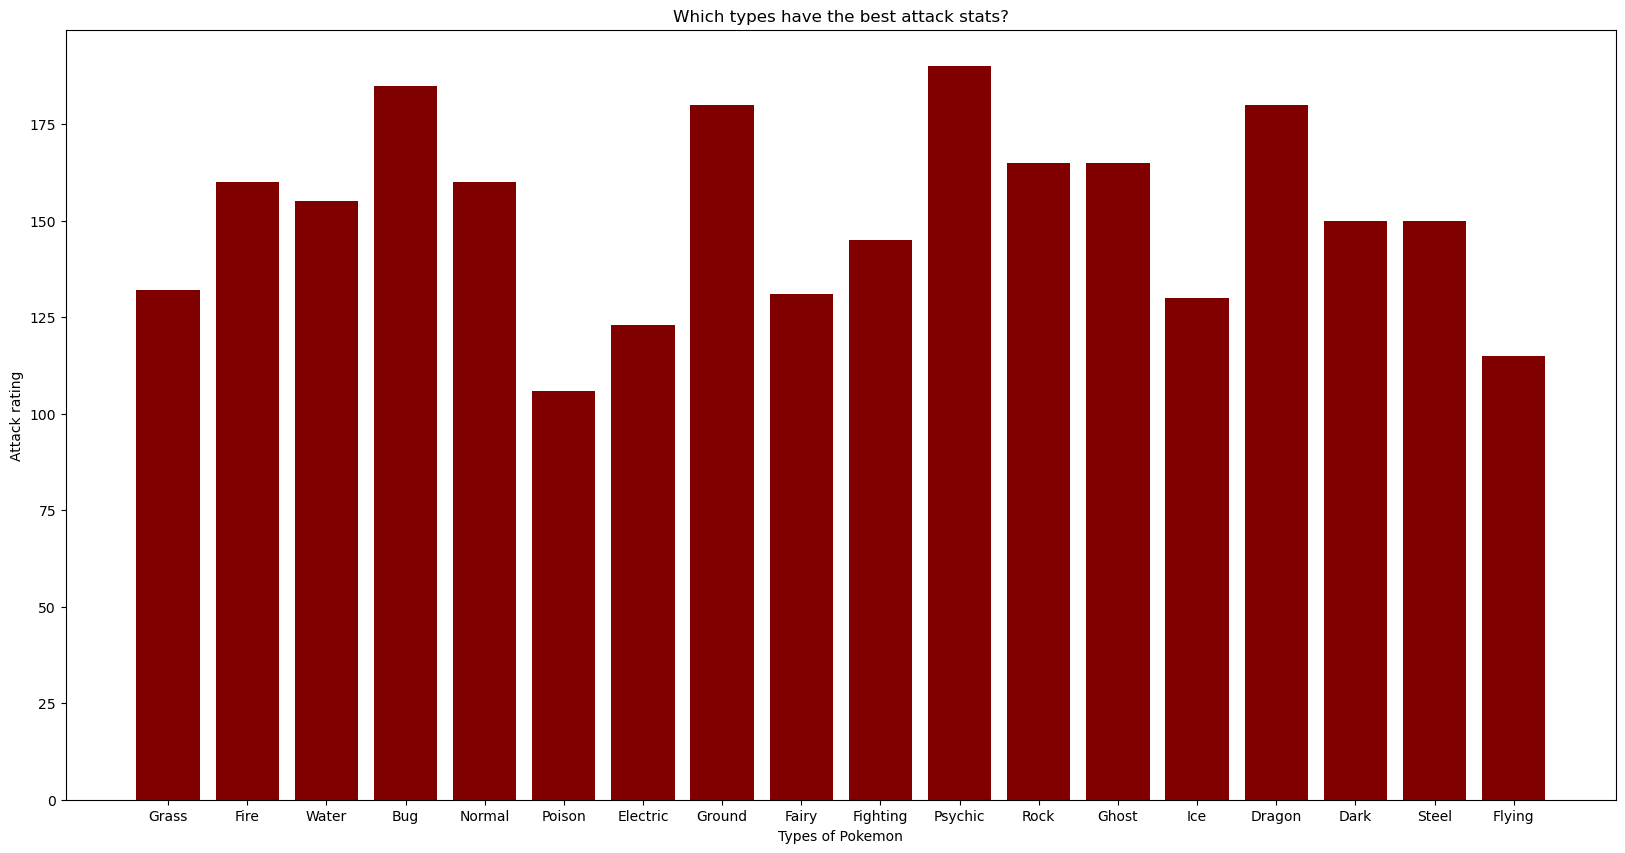

<Figure size 640x480 with 0 Axes>

In [93]:
#which type has the best offense stats

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(poke['Type'], poke['Attack'], color='maroon')
plt.title('Which types have the best attack stats?')
plt.xlabel('Types of Pokemon')
plt.ylabel('Attack rating')
plt.show()
plt.clf()

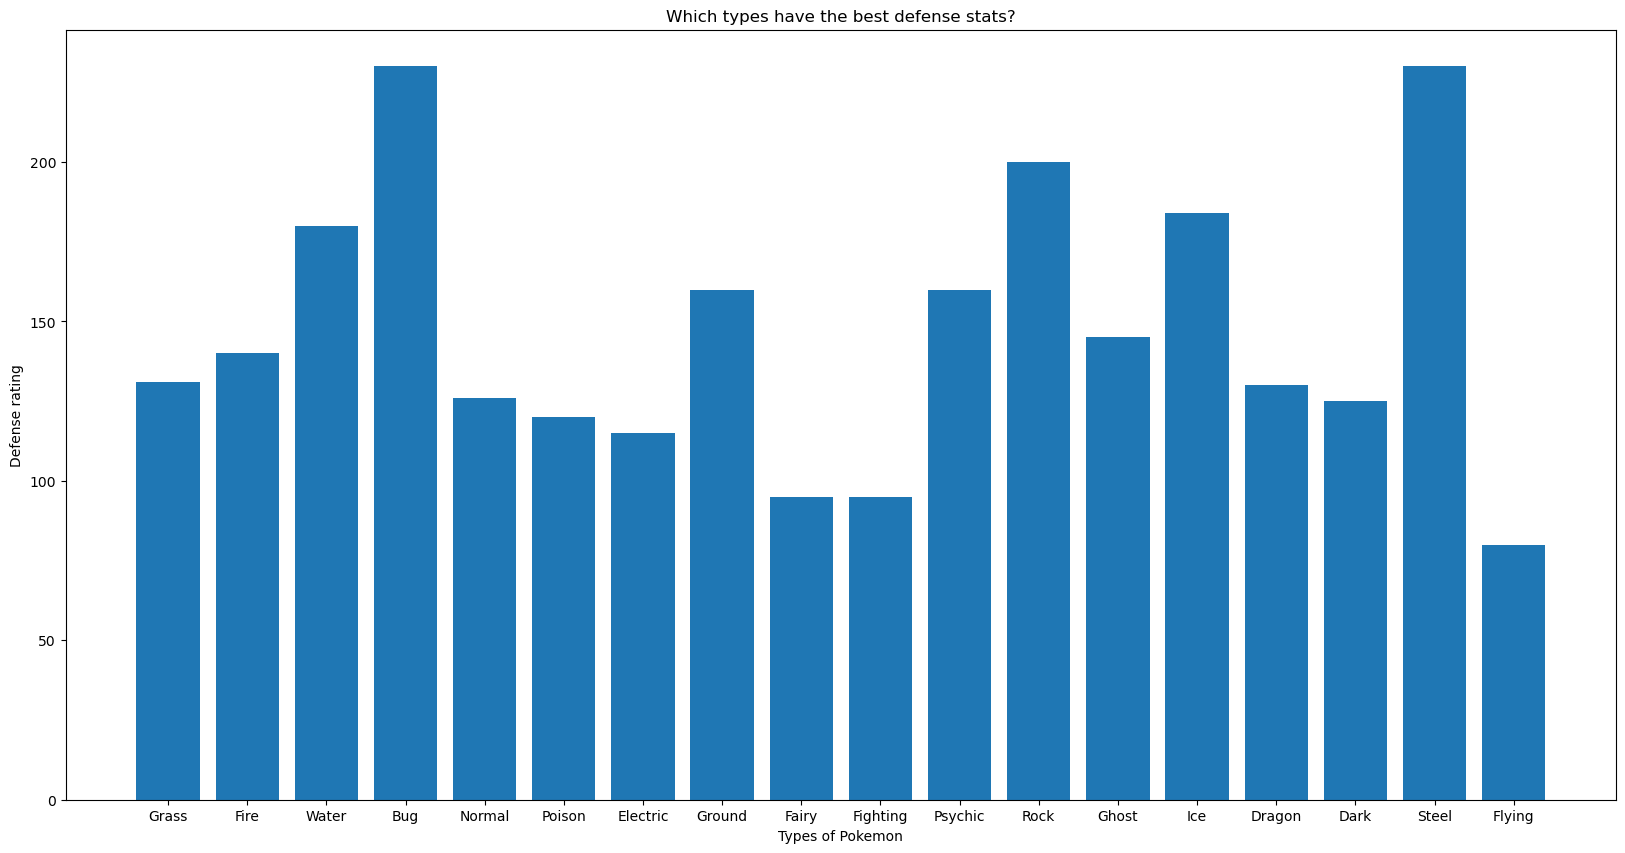

<Figure size 640x480 with 0 Axes>

In [94]:
#which type has the best defense stats

fig2 = plt.figure(figsize=(20,10))
plt.bar(poke['Type'], poke['Defense'])
plt.title('Which types have the best defense stats?')
plt.xlabel('Types of Pokemon')
plt.ylabel('Defense rating')
plt.show()
plt.clf()

In [95]:
# Most powerful and weakest pokemon of each type

poke_power = poke[['Total', 'Name', 'Type']].sort_values(by='Total', ascending=False)

# Will show the most powerful pokemon of that type
print('The most powerful pokemon:')
print(poke_power.groupby('Type').first(), '\n')

# Will show the least powerful pokemon of each type
print('The least powerful pokemon:')
print(poke_power.groupby('Type').last())

The most powerful pokemon:
          Total                     Name
Type                                    
Bug         600        ScizorMega Scizor
Dark        680                  Yveltal
Dragon      780    RayquazaMega Rayquaza
Electric    610    AmpharosMega Ampharos
Fairy       680                  Xerneas
Fighting    625      LucarioMega Lucario
Fire        680                    Ho-oh
Flying      580    TornadusTherian Forme
Ghost       680     GiratinaOrigin Forme
Grass       630    SceptileMega Sceptile
Ground      770    GroudonPrimal Groudon
Ice         580        GlalieMega Glalie
Normal      720                   Arceus
Poison      535                   Crobat
Psychic     780      MewtwoMega Mewtwo Y
Rock        700  TyranitarMega Tyranitar
Steel       700  MetagrossMega Metagross
Water       770      KyogrePrimal Kyogre 

The least powerful pokemon:
          Total        Name
Type                       
Bug         194   Kricketot
Dark        220   Poochyena
Dragon     

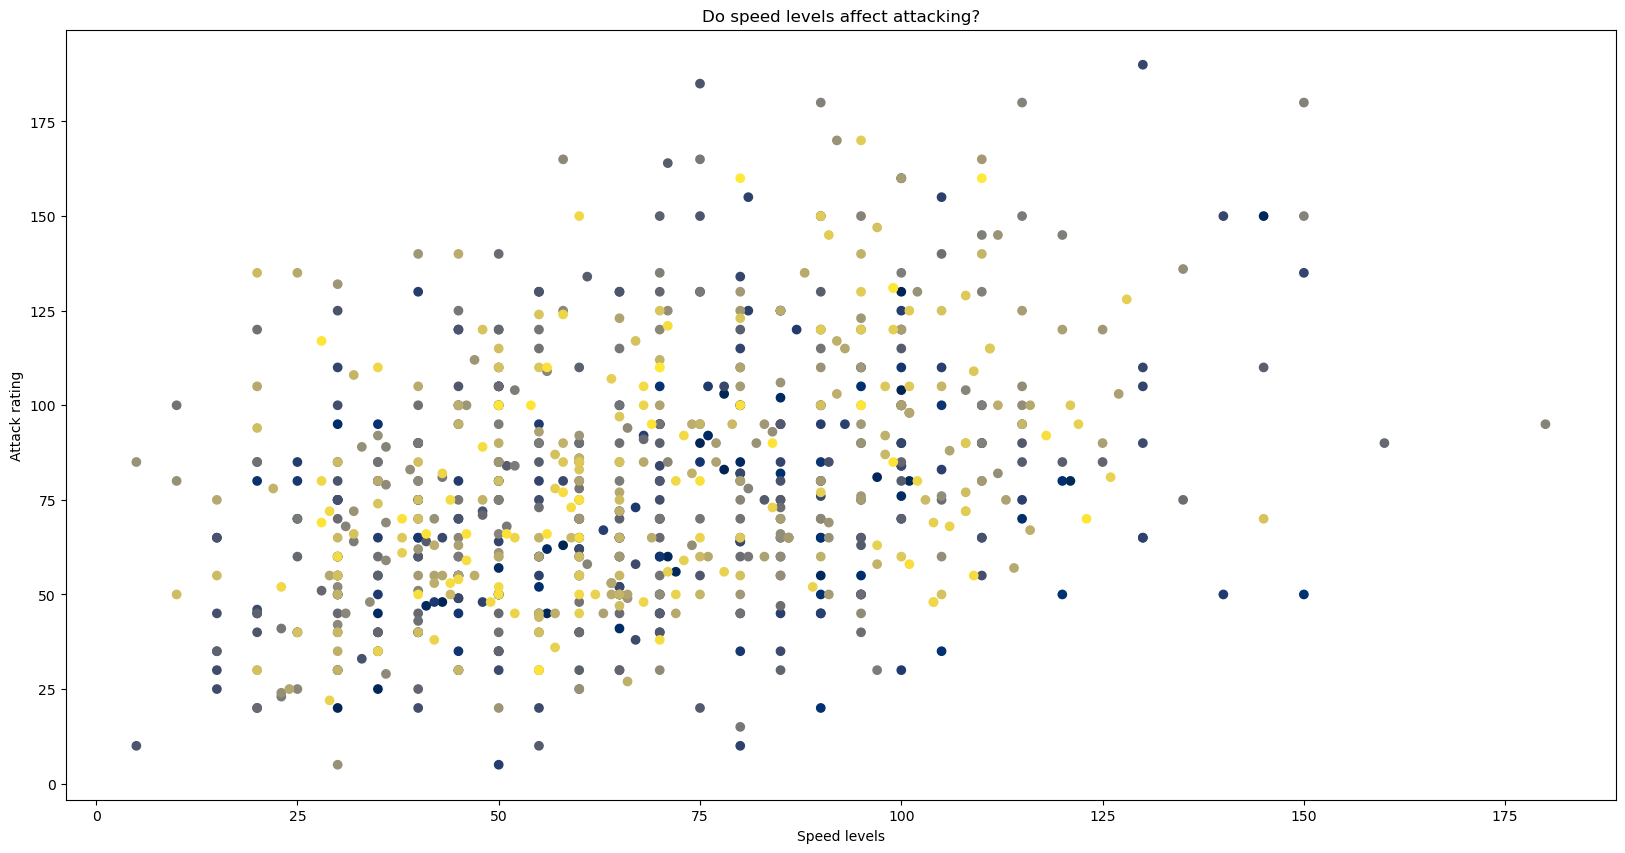

In [96]:
import matplotlib.cm as cm

fig3 = plt.figure(figsize =(20,10))
colors = cm.cividis(np.linspace(0, 1, len(poke['Attack'])))
plt.scatter(poke['Speed'], poke['Attack'], c = colors)
plt.title('Do speed levels affect attacking?')
plt.xlabel('Speed levels')
plt.ylabel('Attack rating')
plt.show()

In [97]:
from scipy.stats import pearsonr

corr_speed_attack, p = pearsonr(poke.Speed, poke.Attack)
print('correlation between speed and attack: %.3f' % corr_speed_attack)

correlation between speed and attack: 0.381


In [98]:
# Statistic Analysis
print(poke.describe().round(2))

           ID   Total      HP  Attack  Defense  Sp_Atk  Sp_Def   Speed  \
count  800.00  800.00  800.00  800.00   800.00  800.00  800.00  800.00   
mean   362.81  435.10   69.26   79.00    73.84   72.82   71.90   68.28   
std    208.34  119.96   25.53   32.46    31.18   32.72   27.83   29.06   
min      1.00  180.00    1.00    5.00     5.00   10.00   20.00    5.00   
25%    184.75  330.00   50.00   55.00    50.00   49.75   50.00   45.00   
50%    364.50  450.00   65.00   75.00    70.00   65.00   70.00   65.00   
75%    539.25  515.00   80.00  100.00    90.00   95.00   90.00   90.00   
max    721.00  780.00  255.00  190.00   230.00  194.00  230.00  180.00   

       Generation  
count      800.00  
mean         3.32  
std          1.66  
min          1.00  
25%          2.00  
50%          3.00  
75%          5.00  
max          6.00  


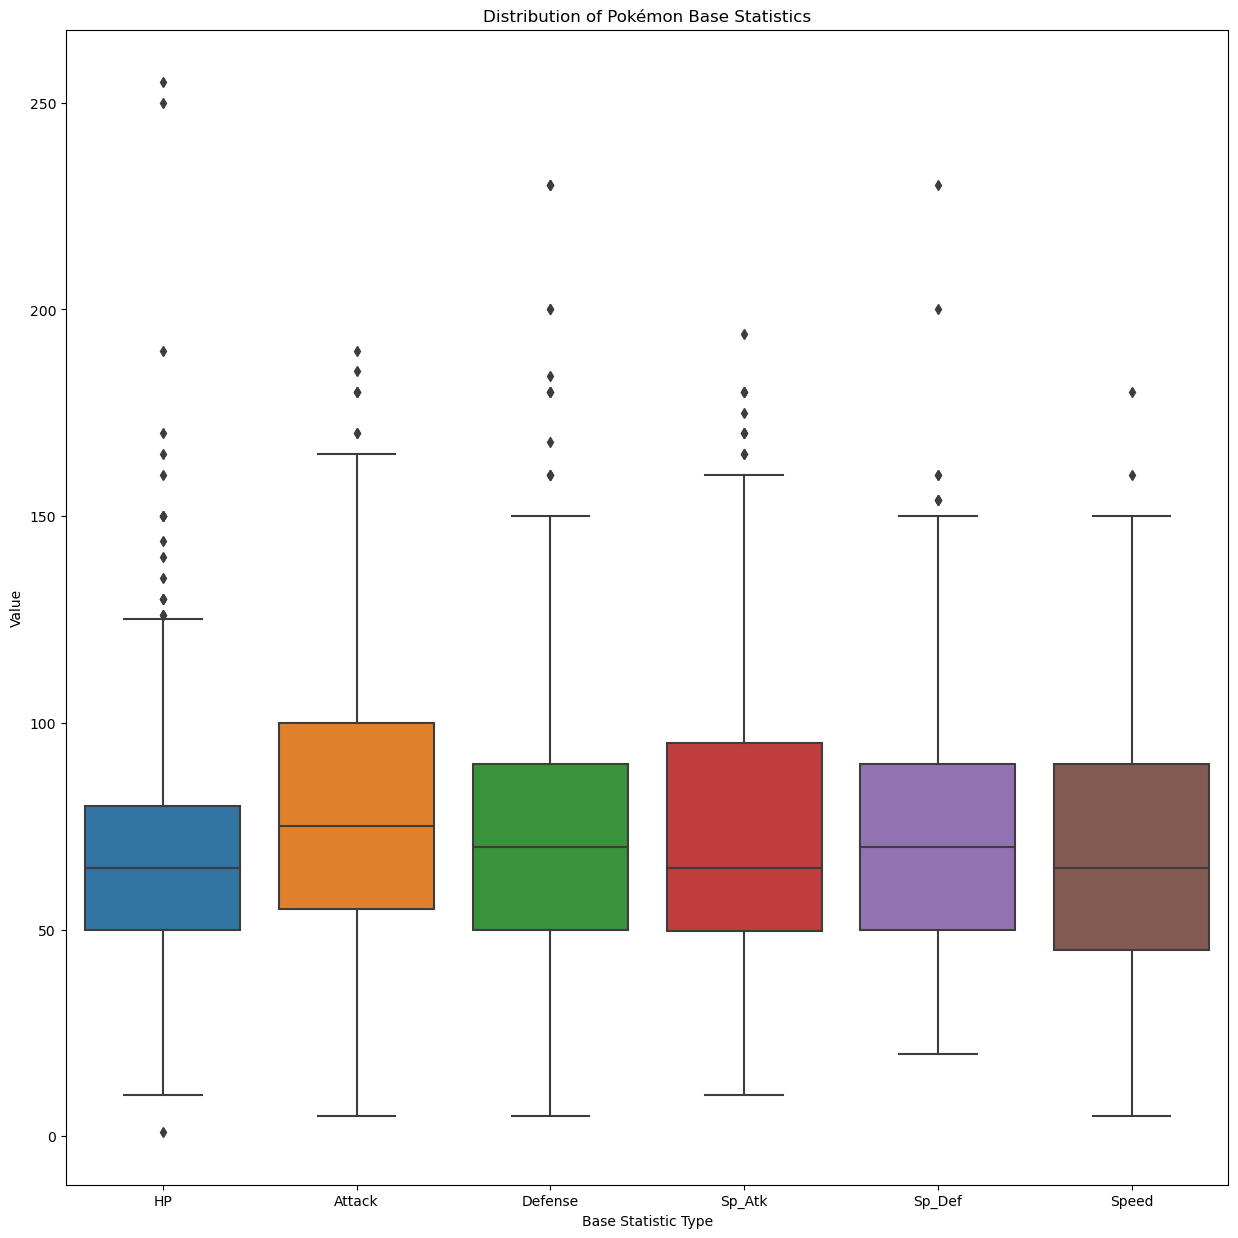

In [99]:
#visualized version of the stats minus the mean and count
fig4 = plt.figure(figsize=(15,15))
sns.boxplot(data=poke[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])
plt.xlabel('Base Statistic Type')
plt.ylabel('Value')
plt.title('Distribution of Pokémon Base Statistics')
plt.show()


### Battle Analysis

In [100]:
# Poke battle testing for more analysis

combats = pd.read_csv('combats.csv')
print(combats.head())

   First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151


In [101]:
#calculating wins and win percentage
win_amt = combats.groupby('Winner').count()
print(win_amt)

        First_pokemon  Second_pokemon
Winner                               
1                  37              37
2                  46              46
3                  89              89
4                  70              70
5                  55              55
...               ...             ...
796                39              39
797               116             116
798                60              60
799                89              89
800                75              75

[783 rows x 2 columns]


In [102]:
#drop 2nd column and rename
win_amt = win_amt.drop('Second_pokemon', axis=1)
win_amt = win_amt.rename(columns={'First_pokemon': 'Win_Amount'})
print(win_amt)

        Win_Amount
Winner            
1               37
2               46
3               89
4               70
5               55
...            ...
796             39
797            116
798             60
799             89
800             75

[783 rows x 1 columns]


In [103]:
#calculate total fights and get win percentage
count_one = combats.groupby('First_pokemon').count()
count_two = combats.groupby('Second_pokemon').count()

win_amt['Total_Fights'] = count_one.Winner + count_two.Winner
win_amt['Win_Percentage'] = (win_amt['Win_Amount'] / win_amt['Total_Fights']).round(2)

print(win_amt)

        Win_Amount  Total_Fights  Win_Percentage
Winner                                          
1               37           133            0.28
2               46           121            0.38
3               89           132            0.67
4               70           125            0.56
5               55           112            0.49
...            ...           ...             ...
796             39           105            0.37
797            116           131            0.89
798             60           119            0.50
799             89           144            0.62
800             75           121            0.62

[783 rows x 3 columns]


In [104]:
# join the dataframes
poke_battles = pd.merge(poke,win_amt, left_on='ID', right_on='Winner')
print(poke_battles.head())

   ID                   Name   Type  Total  HP  Attack  Defense  Sp_Atk  \
0   1              Bulbasaur  Grass    318  45      49       49      65   
1   2                Ivysaur  Grass    405  60      62       63      80   
2   3               Venusaur  Grass    525  80      82       83     100   
3   3  VenusaurMega Venusaur  Grass    625  80     100      123     122   
4   4             Charmander   Fire    309  39      52       43      60   

   Sp_Def  Speed  Generation  Legendary  Win_Amount  Total_Fights  \
0      65     45           1      False          37           133   
1      80     60           1      False          46           121   
2     100     80           1      False          89           132   
3     120     80           1      False          89           132   
4      50     65           1      False          70           125   

   Win_Percentage  
0            0.28  
1            0.38  
2            0.67  
3            0.67  
4            0.56  


In [105]:
# who wins the most battles
poke_battles.sort_values(by = ['Win_Percentage'], ascending = False).head(10)


,ID,Name,Type,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Win_Amount,Total_Fights,Win_Percentage
162,155,Cyndaquil,Fire,309,39,52,43,60,50,65,2,False,127,129,0.98
554,513,Pansear,Fire,316,50,53,48,53,48,64,5,False,116,119,0.97
753,704,Goomy,Dragon,300,45,50,35,55,75,40,6,False,121,125,0.97
24,20,Raticate,Normal,413,55,81,60,50,70,97,1,False,115,119,0.97
161,154,Meganium,Grass,525,80,82,100,83,100,80,2,False,136,141,0.96
772,717,Yveltal,Dark,680,126,131,95,131,98,99,6,True,118,123,0.96
517,477,Dusknoir,Ghost,525,45,100,135,65,135,45,4,False,124,129,0.96
371,350,Milotic,Water,540,95,60,79,100,125,81,3,False,114,120,0.95
462,427,Buneary,Normal,350,55,66,44,44,56,85,4,False,127,134,0.95
172,165,Ledyba,Bug,265,40,20,30,40,80,55,2,False,119,125,0.95


In [106]:
# who lost the most battles
poke_battles.sort_values(by = ['Win_Percentage'], ascending = True).head(10)

,ID,Name,Type,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Win_Amount,Total_Fights,Win_Percentage
197,190,Aipom,Normal,360,55,70,55,40,55,85,2,False,3,122,0.02
304,290,Nincada,Bug,266,31,45,90,30,30,40,3,False,3,138,0.02
680,639,Terrakion,Rock,580,91,129,90,72,90,108,5,True,4,129,0.03
246,237,Hitmontop,Fighting,455,50,95,95,35,110,70,2,False,4,123,0.03
196,189,Jumpluff,Grass,460,75,55,70,55,95,110,2,False,5,115,0.04
619,577,Solosis,Psychic,290,45,30,40,105,50,20,5,False,5,128,0.04
306,292,Shedinja,Bug,236,1,90,45,30,30,40,3,False,7,133,0.05
218,210,Granbull,Fairy,450,90,120,75,60,60,45,2,False,6,125,0.05
429,395,Empoleon,Water,530,84,86,88,111,101,60,4,False,6,130,0.05
433,399,Bidoof,Normal,250,59,45,40,35,40,31,4,False,8,131,0.06


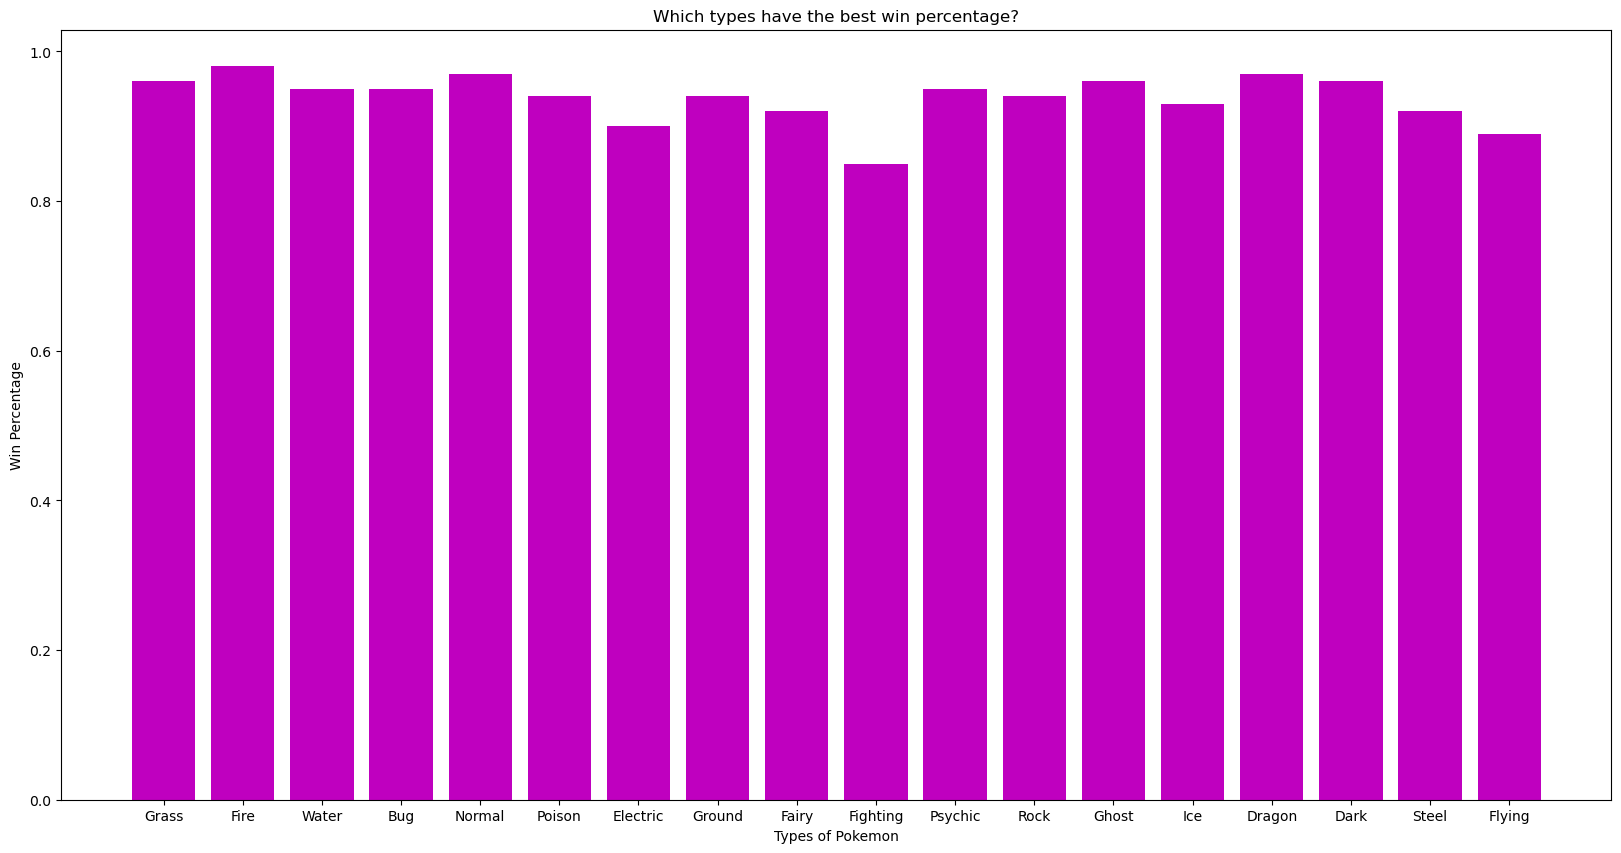

<Figure size 640x480 with 0 Axes>

In [120]:
# commonalities between the best winners
fig5 = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(poke_battles['Type'], poke_battles['Win_Percentage'], color='m')
plt.title('Which types have the best win percentage?')
plt.xlabel('Types of Pokemon')
plt.ylabel('Win Percentage')
plt.show()
plt.clf()

In [119]:
# Which stat helps win the most battles?
stats = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Win_Percentage']
corr_stats = poke_battles[stats]
corr_stats


,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Win_Percentage
0,45,49,49,65,65,45,0.28
1,60,62,63,80,80,60,0.38
2,80,82,83,100,100,80,0.67
3,80,100,123,122,120,80,0.67
4,39,52,43,60,50,65,0.56
...,...,...,...,...,...,...,...
774,50,100,150,100,150,50,0.18
775,50,160,110,160,110,110,0.18
776,80,110,60,150,130,70,0.40
777,80,160,60,170,130,80,0.40


In [109]:
#generate a correlation matrix
stats_corr = corr_stats.corr()
stats_corr

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Win_Percentage
HP,1.000000,0.422299,0.245878,0.368812,0.384917,0.178095,0.003544
Attack,0.422299,1.000000,0.443021,0.399587,0.268068,0.381312,0.005653
Defense,0.245878,0.443021,1.000000,0.215885,0.506387,0.006496,0.025748
Sp_Atk,0.368812,0.399587,0.215885,1.000000,0.497888,0.466812,-0.047932
Sp_Def,0.384917,0.268068,0.506387,0.497888,1.000000,0.249769,-0.003067
Speed,0.178095,0.381312,0.006496,0.466812,0.249769,1.000000,0.016240
Win_Percentage,0.003544,0.005653,0.025748,-0.047932,-0.003067,0.016240,1.000000


# Conclusion

#### Findings Overview

It has been shown that Water is the most common Pokemon type, shortly after is the Normal type. 
We have also found that Speed is the best trait if you want to win battles, then the next best trait is the Attack rating.
Although the Fighting type's median "Total" statistic falls in the middle between all types, it seems to have the lowest win percentage. On the other hand, Fire type seems to have the highest win percentage while being one of the less common Pokemon types. These insights will help us build the best team of Pokemon.